# Matplotlib practice tasks

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1: нарисовать квадрат с вершинами в точках (1, 1), (1, -1), (-1, -1), (-1, 1)

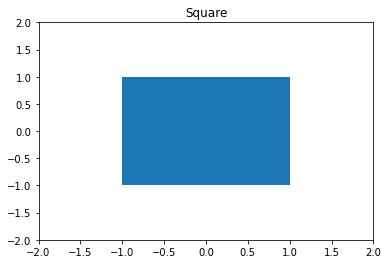

In [5]:
from matplotlib.patches import Rectangle


fig, ax = plt.subplots()
square = Rectangle((-1, -1), 2, 2, fill=True)
ax.add_patch(square)
ax.axis([-2, 2, -2, 2])
ax.set_title('Square')

plt.show()

### Task2: построить точечный график y = sin(x)

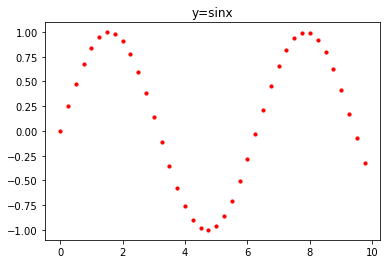

In [6]:
x = np.arange(0, 10, 0.25)
y = np.sin(x)

fig, ax = plt.subplots()
ax.scatter(x, y, s=10, c='r')
ax.set_title('y=sinx')

plt.show()

### Task3: построить гистограмму распределения Пуассона с использованием numpy.random $$p(x) = \frac{e^{-\lambda}\lambda^x}{x!}, \lambda = 1.5; x = 0, 1, ..., 10000$$ 

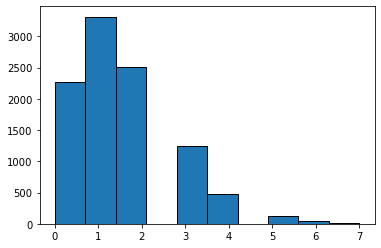

In [7]:
y = np.random.poisson(lam=1.5,size=10000)

fig, ax = plt.subplots()
ax.hist(y, ec='black')
plt.show()

## Задача Коши:
### $ \frac{d \pmb{u}}{d t} = \pmb{F}(t, \pmb{u}), \quad t > 0, $$ 
$$  \pmb{u}(0) = \pmb{u}_0$

### необходимо по известному решению в $t=0$ необходимо найти из уравнения решение при других $t$.

### Явный метод эйлера:

In [30]:
def euler(u0, T, F, tau):
    t_arr = np.arange(0, T, tau)
    u = u0
    for t in t_arr:
        u = u + tau * F(t, u)
    return u

### Метод Рунге-Кутта четвертого порядка

In [31]:
def runge_kutta(u0, T, F, tau):
    t_arr = np.arange(0, T, tau)
    u = u0
    for t in t_arr:
        k1 = F(t, u)
        k2 = F(t + tau / 2, u + tau * k1 / 2)
        k3 = F(t + tau / 2, u + tau * k2 / 2)
        k4 = F(t + tau, u + tau * k3)
        u = u + tau * 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return u

#### Проверка: F(t, u) = -sinu, u(0) = 1, (u = e^cost)

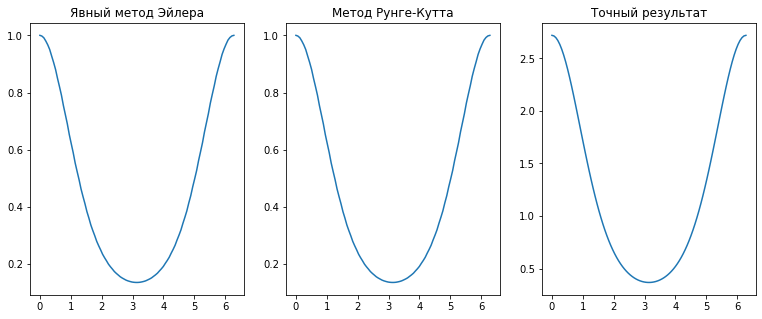

In [45]:
def F(t, u):
    return -1 * u * np.sin(t)

N = 100
u0 = 1
tau = 0.01

T_arr = np.linspace(0, 2 * np.pi, N)
u1 = u2 = np.zeros(N)

for i, T in enumerate(T_arr):
    u1[i] = euler(u0, T, F, tau)
    u2[i] = runge_kutta(u0, T, F, tau)
    
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=[13, 5])
axs[0].plot(T_arr, u1)
axs[0].set_title('Явный метод Эйлера')
axs[1].plot(T_arr, u2)
axs[1].set_title('Метод Рунге-Кутта')
axs[2].plot(T_arr, np.exp(np.cos(T_arr)))
axs[2].set_title('Точный результат')
plt.show()
